In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df=pd.read_csv("/content/Food_Delivery_Time_Prediction.csv")
print(df.head())

  Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   

  Weather_Conditions Traffic_Conditions  Delivery_Person_Experience  \
0              Rainy             Medium                           4   
1             Cloudy             Medium                           8   
2              Snowy             Medium                           9   
3             Cloudy                Low                           2   
4              Rainy               High                           6   

  Order_Priority Order_Time Vehicle_Type  Restaurant_Rating  Customer_Rating  \
0         Medium  Afternoon          Car                4.1 

In [ ]:
print(df)
df=df.dropna(how="all")
print(df)

    Order_ID       Customer_Location     Restaurant_Location  Distance  \
0    ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1    ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2    ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3    ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4    ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   
..       ...                     ...                     ...       ...   
195  ORD0196   (17.910045, 81.56199)  (18.098924, 87.896124)     23.82   
196  ORD0197   (21.66459, 82.226635)  (16.892341, 80.554716)      6.09   
197  ORD0198   (14.575401, 82.55641)  (13.625369, 82.418092)     20.61   
198  ORD0199  (12.094497, 82.893369)  (19.135509, 86.659978)     24.06   
199  ORD0200  (19.360304, 84.132424)   (20.941636, 77.01334)      9.18   

    Weather_Conditions Traffic_Conditions  Delivery_Person_Experience  \
0                Rainy             Med

In [ ]:
columns=["Distance","Delivery_Time","Order_Cost"]
scaler = MinMaxScaler()
print(df[columns])
df[columns]=scaler.fit_transform(df[columns])
print(df[columns])

     Distance  Delivery_Time  Order_Cost
0        1.57          26.22     1321.10
1       21.32          62.61      152.21
2        6.95          48.43     1644.38
3       13.79         111.63      541.25
4        6.72          32.38      619.81
..        ...            ...         ...
195     23.82          50.39     1432.26
196      6.09          90.54     1720.25
197     20.61          73.20     1356.58
198     24.06          53.94      354.39
199      9.18          78.58      323.73

[200 rows x 3 columns]
     Distance  Delivery_Time  Order_Cost
0    0.043068       0.105228    0.639319
1    0.853158       0.453658    0.015951
2    0.263741       0.317886    0.811724
3    0.544299       0.923018    0.223426
4    0.254307       0.164209    0.265322
..        ...            ...         ...
195  0.955701       0.336653    0.698601
196  0.228466       0.721084    0.852185
197  0.824036       0.555056    0.658241
198  0.965546       0.370643    0.123773
199  0.355209       0.606568    0

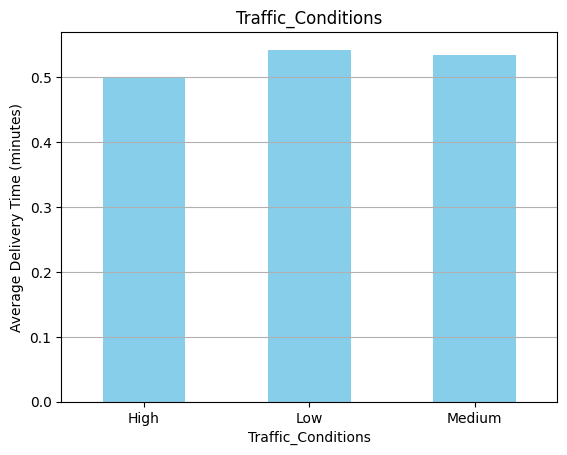

In [ ]:
avg_delivery_by_vehicle = df.groupby('Traffic_Conditions')['Delivery_Time'].mean()
import matplotlib.pyplot as plt
avg_delivery_by_vehicle.plot(kind='bar', color='skyblue')
plt.ylabel('Average Delivery Time (minutes)')
plt.title('Traffic_Conditions')
plt.xticks(rotation=0)
plt.xticks(ticks=[0,1,2], labels=['High', 'Low', 'Medium'])
plt.grid(axis='y')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type', 'Order_Priority'], drop_first=True)

print(df.head())

  Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)  0.043068   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)  0.853158   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)  0.263741   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)  0.544299   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)  0.254307   

   Delivery_Person_Experience Order_Time  Restaurant_Rating  Customer_Rating  \
0                           4  Afternoon                4.1              3.0   
1                           8      Night                4.5              4.2   
2                           9      Night                3.3              3.4   
3                           2    Evening                3.2              3.7   
4                           6      Night                3.5              2.8   

   Delivery_Time  Order_Cost  Tip_Amount  Weather_Conditions_Rainy  \
0       0.105228

In [ ]:
print(df.columns)

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Delivery_Person_Experience', 'Order_Time', 'Restaurant_Rating',
       'Customer_Rating', 'Delivery_Time', 'Order_Cost', 'Tip_Amount',
       'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy',
       'Weather_Conditions_Sunny', 'Traffic_Conditions_Low',
       'Traffic_Conditions_Medium', 'Vehicle_Type_Bike', 'Vehicle_Type_Car',
       'Order_Priority_Low', 'Order_Priority_Medium'],
      dtype='object')


In [ ]:
mean=df['Delivery_Time'].mean()
variance=df['Delivery_Time'].var()
mode=df['Delivery_Time'].mode()
print(mean,variance,mode)

0.529155017234776 0.08158174620669842 0    0.494159
Name: Delivery_Time, dtype: float64


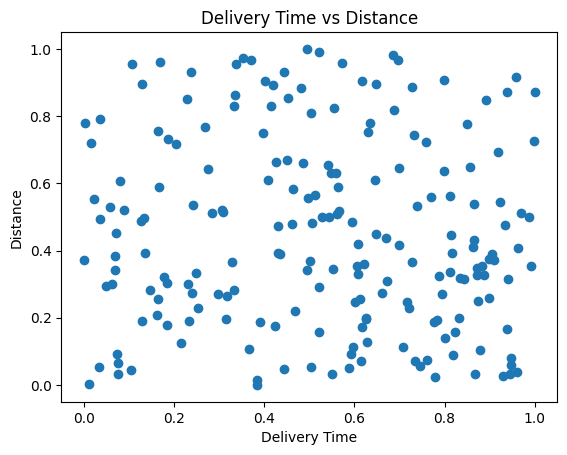

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Delivery_Time'],df['Distance'])
plt.xlabel('Delivery Time')
plt.ylabel('Distance')
plt.title('Delivery Time vs Distance')
plt.show()

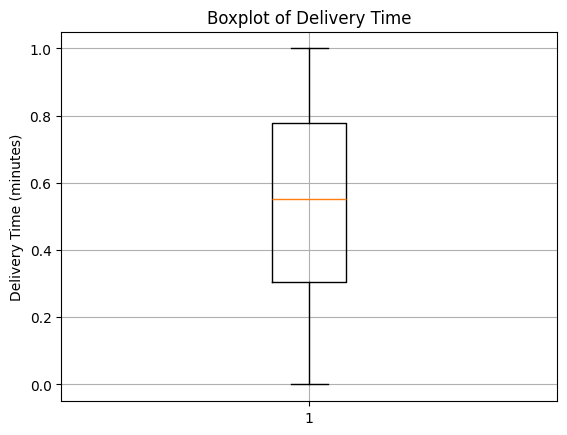

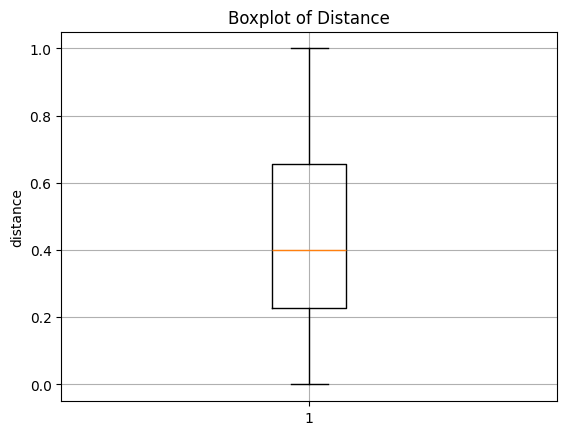

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['Delivery_Time'])
plt.title('Boxplot of Delivery Time')
plt.ylabel('Delivery Time (minutes)')
plt.grid(True)
plt.show()
plt.boxplot(df['Distance'])
plt.title('Boxplot of Distance')
plt.ylabel('distance')
plt.grid(True)
plt.show()


In [ ]:
Q1 = df['Delivery_Time'].quantile(0.25)
Q3 = df['Delivery_Time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 0.25 * IQR
upper_bound = Q3 + 0.25 * IQR
outliers = df[(df['Delivery_Time'] < lower_bound) | (df['Delivery_Time'] > upper_bound)]
print("Outliers:\n", outliers)
df = df[(df['Delivery_Time'] >= lower_bound) & (df['Delivery_Time'] <= upper_bound)]

Outliers:
     Order_ID       Customer_Location     Restaurant_Location  Distance  \
0    ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)  0.043068   
3    ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)  0.544299   
4    ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)  0.254307   
6    ORD0007   (21.397639, 84.89693)  (15.934011, 86.767357)  0.189910   
12   ORD0013    (15.800841, 79.0468)  (19.299898, 77.014496)  0.033634   
14   ORD0015  (12.865312, 81.430712)  (16.452125, 83.164956)  0.391715   
16   ORD0017  (21.621044, 83.330567)  (12.736908, 77.460086)  0.553733   
23   ORD0024  (14.702472, 87.730108)  (15.846967, 78.528528)  0.207547   
26   ORD0027  (21.852091, 81.820285)   (12.73781, 86.919703)  0.091879   
29   ORD0030  (20.091229, 80.580827)  (14.156297, 84.191408)  0.178425   
31   ORD0032  (20.287421, 78.348979)  (18.448297, 78.690502)  0.495078   
45   ORD0046  (14.334146, 86.906413)  (15.405122, 77.677359)  0.488925   
47   ORD0048  (20.407941, 8

In [ ]:
Q1 = df['Distance'].quantile(0.25)
Q3 = df['Distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 0.25 * IQR
upper_bound = Q3 + 0.25 * IQR
outliers = df[(df['Distance'] < lower_bound) | (df['Distance'] > upper_bound)]
print("Outliers:\n", outliers)
df = df[(df['Distance'] >= lower_bound) & (df['Distance'] <= upper_bound)]

Outliers:
     Order_ID       Customer_Location     Restaurant_Location  Distance  \
1    ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)  0.853158   
7    ORD0008  (12.512731, 86.268971)    (12.019922, 78.4686)  0.904430   
9    ORD0010  (14.364647, 87.968582)  (13.508338, 84.206901)  0.780968   
11   ORD0012   (21.81819, 81.305941)  (19.321344, 80.471393)  0.103363   
13   ORD0014   (17.328378, 81.85932)  (21.881675, 82.349324)  0.014356   
15   ORD0016    (14.62525, 78.17385)  (12.069338, 80.962928)  0.828958   
25   ORD0026  (18.407158, 83.443782)  (20.356516, 87.150792)  0.126743   
30   ORD0031  (17.012613, 78.845912)  (14.558344, 77.803961)  0.967186   
35   ORD0036  (18.214891, 82.606697)  (14.159996, 86.423698)  0.931501   
39   ORD0040   (21.941596, 85.76634)  (20.060287, 85.547677)  0.074241   
43   ORD0044   (16.09293, 83.497623)  (14.216243, 82.909317)  0.090238   
49   ORD0050  (15.667688, 85.451696)  (18.000511, 86.990308)  0.893765   
51   ORD0052  (17.813093, 8

In [ ]:
print(df.head())

   Order_ID       Customer_Location     Restaurant_Location  Distance  \
2   ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)  0.263741   
5   ORD0006   (15.560205, 80.59125)  (12.478068, 78.823965)  0.388843   
8   ORD0009   (18.814724, 86.95472)   (15.30437, 84.059261)  0.519688   
10  ORD0011  (13.516083, 77.368398)  (21.043034, 80.024796)  0.730927   
17  ORD0018   (13.110016, 81.85359)  (16.175275, 81.118374)  0.173093   

    Delivery_Person_Experience Order_Time  Restaurant_Rating  Customer_Rating  \
2                            9      Night                3.3              3.4   
5                           10    Evening                2.8              3.3   
8                            8      Night                3.2              3.0   
10                           7  Afternoon                3.5              3.6   
17                           2  Afternoon                2.5              4.6   

    Delivery_Time  Order_Cost  Tip_Amount  Weather_Conditions_Rainy  \
2  

In [ ]:
X = df.drop(['Delivery_Time', 'Order_ID', 'Customer_Location', 'Restaurant_Location', 'Order_Time'], axis=1)  # All columns except the target and non-numeric columns
y = df['Delivery_Time']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.21409504874891105
R² Score: -4.55521400819874
Mean Absolute Error: 0.3832995873593673


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
delivery_time_threshold = df['Delivery_Time'].mean()
y_binary = (df['Delivery_Time'] < delivery_time_threshold).astype(int)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_binary, test_size=0.8, random_state=1)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_clf, y_train_clf)
y_pred_clf = logistic_model.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
conf_matrix


Logistic Regression Model Evaluation:
Accuracy: 0.5526
Precision: 0.5238
Recall: 0.6111
F1-score: 0.5641
Confusion Matrix:


array([[20, 20],
       [14, 22]])

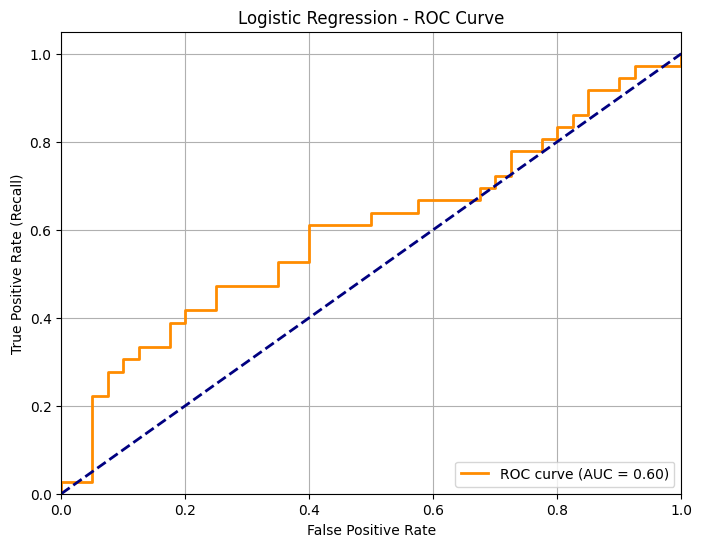

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = logistic_model.predict_proba(X_test_clf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_clf, y_probs)
auc_score = roc_auc_score(y_test_clf, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Overall, the analysis reveals key factors influencing food delivery times and provides predictive models to improve efficiency.  Exploratory data analysis showed that traffic conditions impact delivery times, and outliers in delivery time and distance were handled. A Linear Regression model was built to predict delivery time, achieving an Mean Squared Error: 0.21R² Score: -4.55, Mean Absolute Error: 0.38 A Logistic Regression model was also developed to classify whether delivery time is below the average, yielding an Accuracy: 0.5526, Precision: 0.5238, Recall: 0.6111, F1-score: 0.5641 with an AUC of 0.60.  The low R² for the linear model suggests that the current features may not fully capture the variability in delivery time, indicating a need to incorporate additional factors such as time of day, restaurant preparation time, or driver availability. The logistic regression model shows performance slightly better than random chance.  